In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.callbacks import TensorBoard

In [7]:
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

/media/aditya/Foxin 256GB SATA/All Github/let-s-Cook-ANN-/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [8]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8177 - loss: 0.5116 - val_accuracy: 0.7112 - val_loss: 0.9236
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8293 - loss: 0.4746 - val_accuracy: 0.7035 - val_loss: 0.9644
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8473 - loss: 0.4367 - val_accuracy: 0.7154 - val_loss: 0.9601
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8573 - loss: 0.4006 - val_accuracy: 0.7044 - val_loss: 1.0314
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8653 - loss: 0.3719 - val_accuracy: 0.7019 - val_loss: 1.0680
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8801 - loss: 0.3345 - val_accuracy: 0.7003 - val_loss: 1.1308
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8874 - loss: 0.3143 - val_accuracy: 0.6997 - val_loss: 1.1616
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8995 - loss: 0.2835 

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.6981 - loss: 0.8661

Test accuracy: 0.6980999708175659


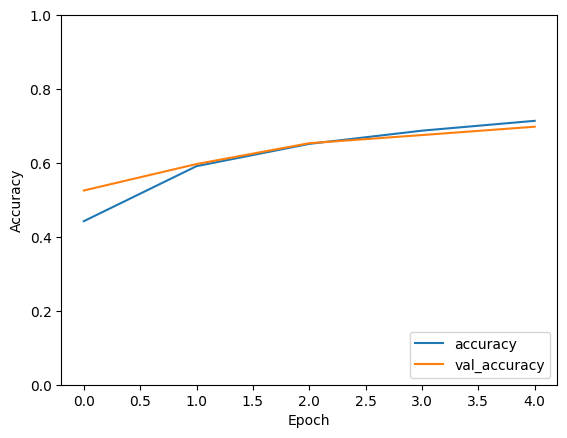

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [19]:
y_pred = model.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

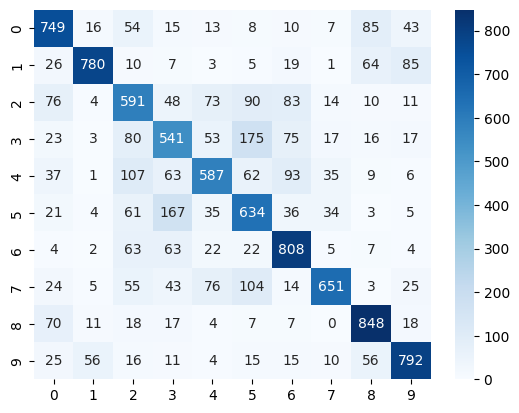

In [20]:
conf_matrix = confusion_matrix(test_labels, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

In [22]:
print(classification_report(test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1000
           1       0.88      0.78      0.83      1000
           2       0.56      0.59      0.58      1000
           3       0.55      0.54      0.55      1000
           4       0.67      0.59      0.63      1000
           5       0.57      0.63      0.60      1000
           6       0.70      0.81      0.75      1000
           7       0.84      0.65      0.73      1000
           8       0.77      0.85      0.81      1000
           9       0.79      0.79      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

